## Load Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

## Load Data

In [5]:
File_Path = os.path.join(os.getcwd(), 'StudentPerformanceFactors.csv')
df = pd.read_csv(File_Path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.shape

(6607, 20)

In [7]:
df.columns.str.lower().str.strip().str.replace(' ', '_')

Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
       'peer_influence', 'physical_activity', 'learning_disabilities',
       'parental_education_level', 'distance_from_home', 'gender',
       'exam_score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
(df == 0).sum()

Hours_Studied                    0
Attendance                       0
Parental_Involvement             0
Access_to_Resources              0
Extracurricular_Activities       0
Sleep_Hours                      0
Previous_Scores                  0
Motivation_Level                 0
Internet_Access                  0
Tutoring_Sessions             1513
Family_Income                    0
Teacher_Quality                  0
School_Type                      0
Peer_Influence                   0
Physical_Activity               46
Learning_Disabilities            0
Parental_Education_Level         0
Distance_from_Home               0
Gender                           0
Exam_Score                       0
dtype: int64

In [11]:
df.describe(include = 'object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [12]:
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 40)

Unique values in Hours_Studied:
[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
----------------------------------------
Unique values in Attendance:
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
----------------------------------------
Unique values in Parental_Involvement:
['Low' 'Medium' 'High']
----------------------------------------
Unique values in Access_to_Resources:
['High' 'Medium' 'Low']
----------------------------------------
Unique values in Extracurricular_Activities:
['No' 'Yes']
----------------------------------------
Unique values in Sleep_Hours:
[ 7  8  6 10  9  5  4]
----------------------------------------
Unique values in Previous_Scores:
[ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52

## Preprocessing 

In [14]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [15]:
df.columns[df.isnull().any()].to_list()

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

In [16]:
df.duplicated().sum()

0

In [17]:
##Imputing
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [19]:
import missingno as msno

<Axes: >

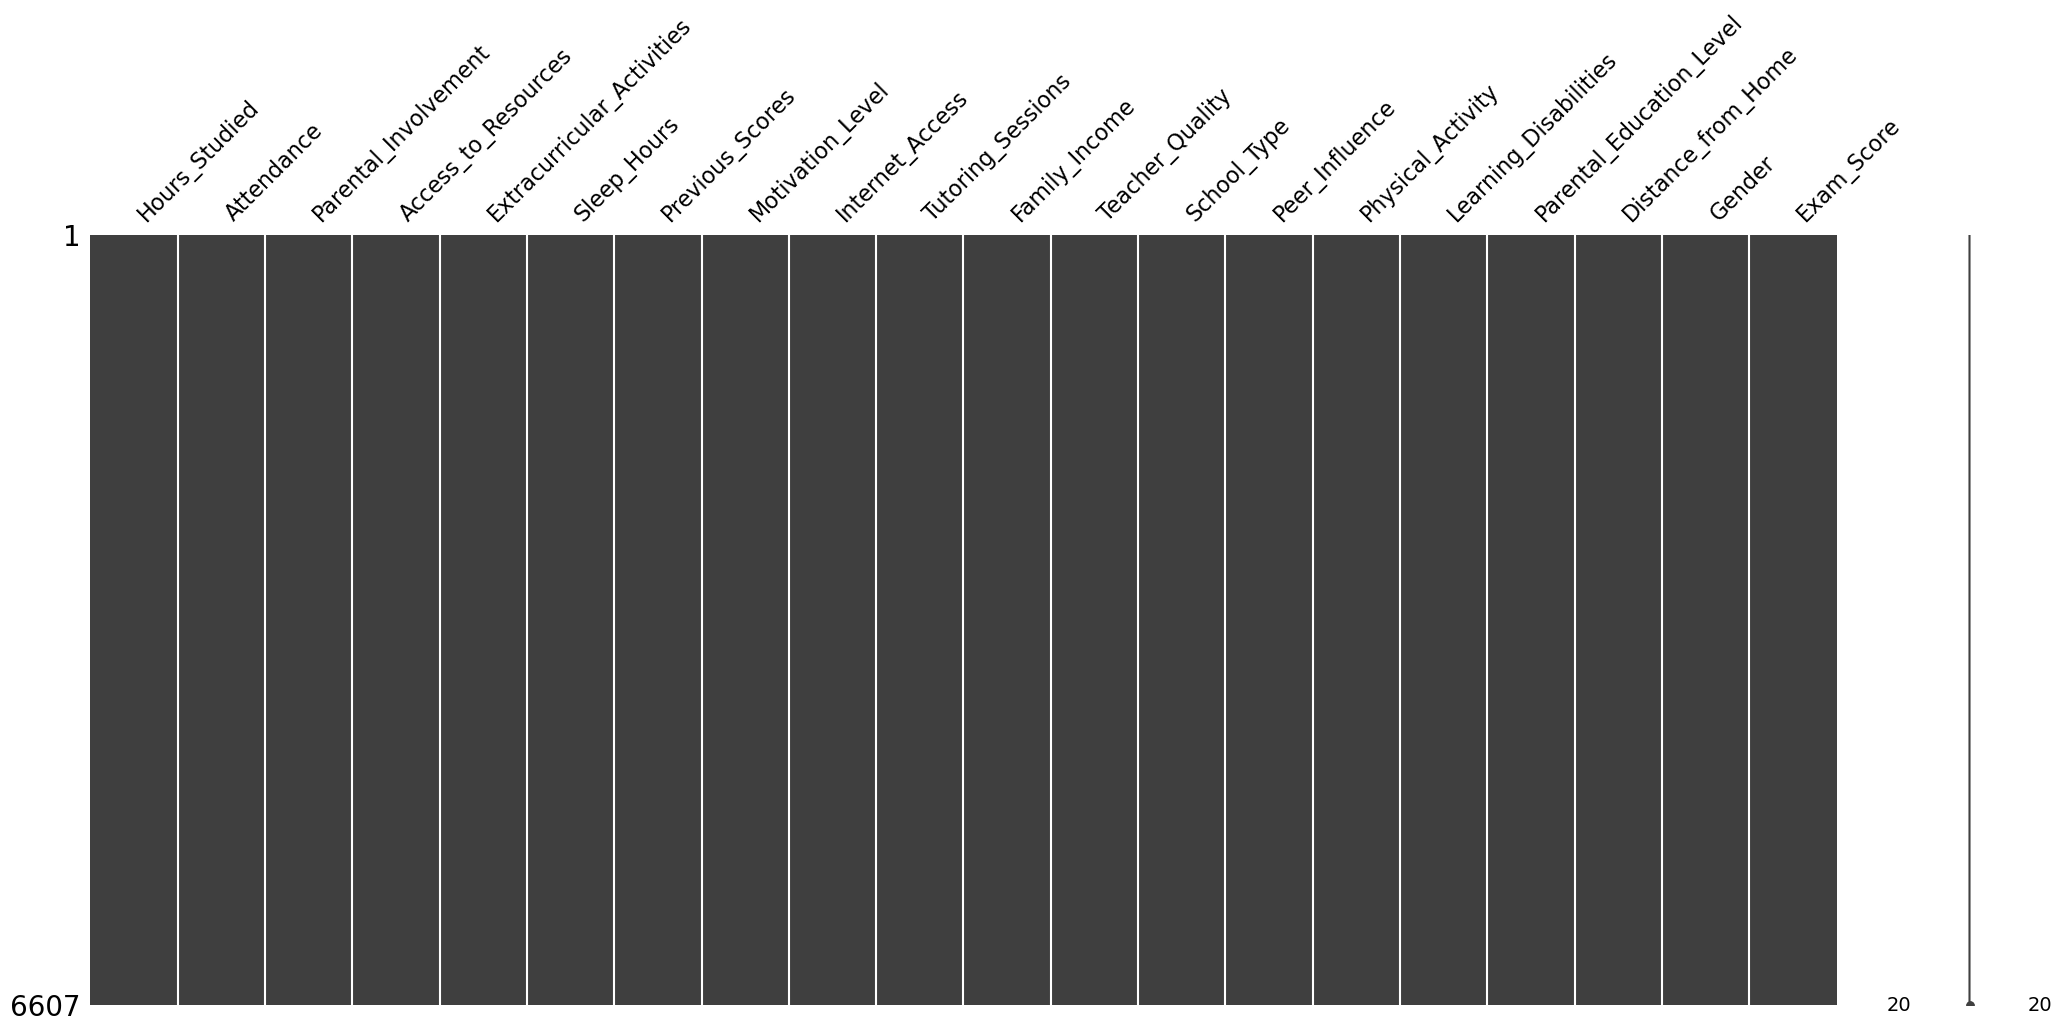

In [20]:
msno.matrix(df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [22]:
df['Exam_Score'].value_counts().index.tolist()

[68,
 66,
 67,
 65,
 69,
 70,
 64,
 71,
 63,
 72,
 62,
 61,
 73,
 74,
 60,
 75,
 59,
 58,
 76,
 80,
 77,
 57,
 82,
 94,
 86,
 78,
 84,
 97,
 89,
 79,
 88,
 98,
 93,
 92,
 95,
 99,
 87,
 96,
 85,
 91,
 100,
 83,
 101,
 55,
 56]

In [23]:
df[df['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [24]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100

In [25]:
df[df['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [26]:
# Calculate the range of 'Exam_Score' (max - min)
max_score = df['Exam_Score'].max()
min_score = df['Exam_Score'].min()
score_range = max_score - min_score
print(f"\nRange of Exam Scores: {score_range}")


Range of Exam Scores: 45


In [27]:
## Calculate and display mean and standard deviation of 'Exam_Score'
mean_exam = df['Exam_Score'].mean()
std_exam = df['Exam_Score'].std()
print(f"Mean: {mean_exam}  , Standard Deviation: {std_exam}")

Mean: 67.23550779476312  , Standard Deviation: 3.8891612482847524


In [28]:
# Calculate the number of students with above-average 'Exam_Score'
above_avg_count = df[df['Exam_Score'] > mean_exam].shape[0]
print(f"\nNumber of Students with Above Average Scores: {above_avg_count}")


Number of Students with Above Average Scores: 3008


In [29]:
# Calculate and display mean and standard deviation of 'Hours_Studied'
mean_hours_studied = df['Hours_Studied'].mean()
std_hours_studied = df['Hours_Studied'].std()
print(f"\nMean Hours Studied: {mean_hours_studied}, Standard Deviation: {std_hours_studied}")


Mean Hours Studied: 19.975329196306948, Standard Deviation: 5.990594336578764


In [30]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(exclude = 'number').columns

### EDA (Exploratory Data Analysis)

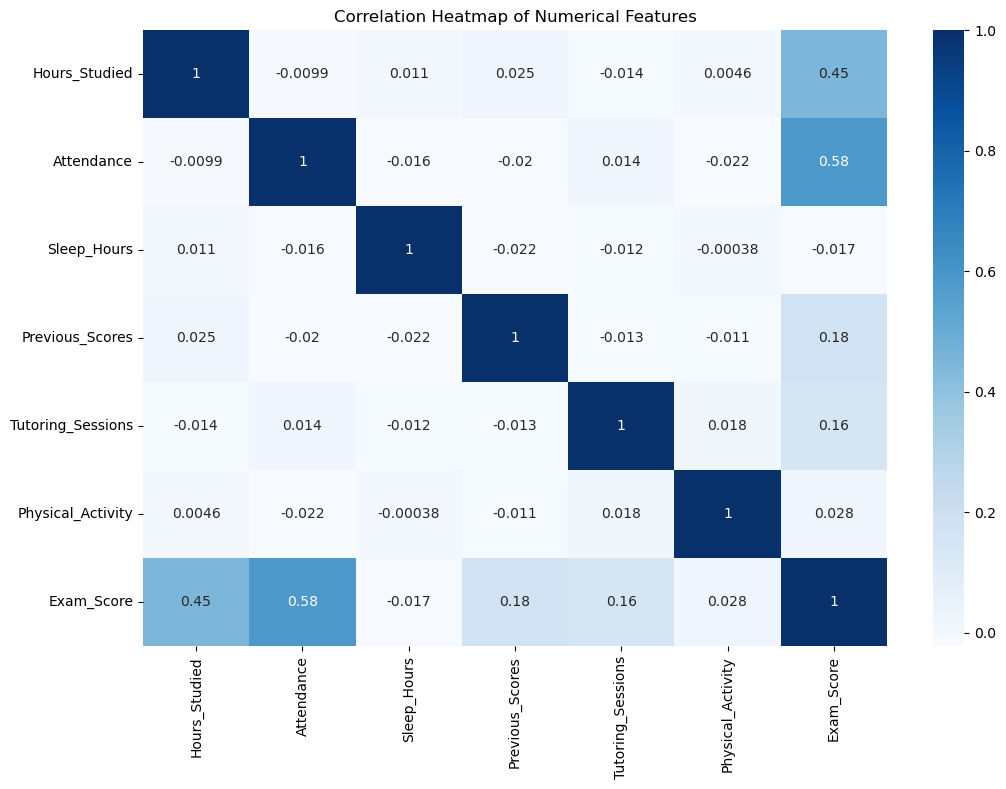

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_col].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

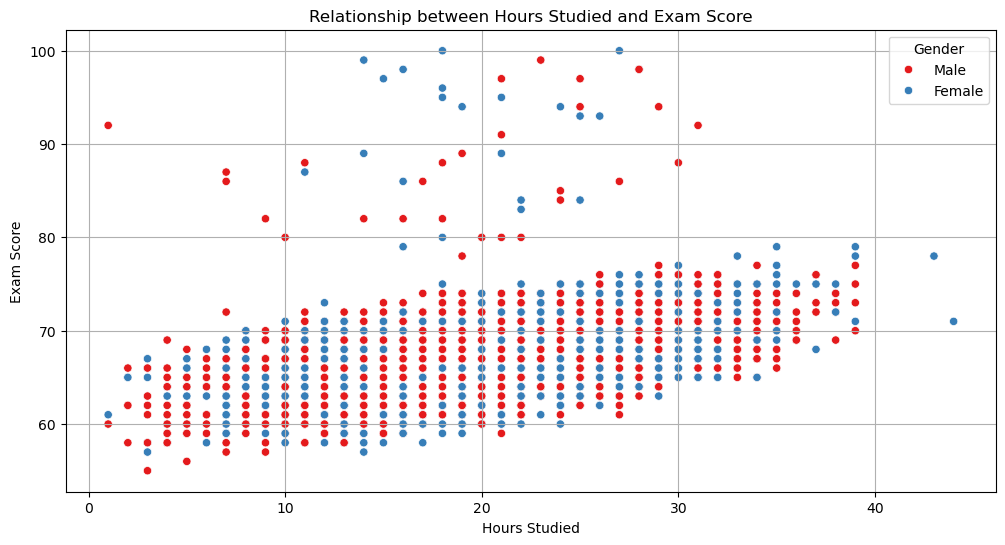

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue = 'Gender', palette='Set1')
plt.title('Relationship between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [34]:
# Group exam scores into bins
df['score_group'] = pd.cut(df['Exam_Score'], bins=[50, 60, 70, 80, 90, 100], labels=['50-60', '60-70', '70-80', '80-90', '90-100'])

In [35]:
# Calculate average sleep hours per score group
sleep_by_score = df.groupby('score_group')['Sleep_Hours'].mean().reset_index()

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\2139382609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_by_score = df.groupby('score_group')['Sleep_Hours'].mean().reset_index()


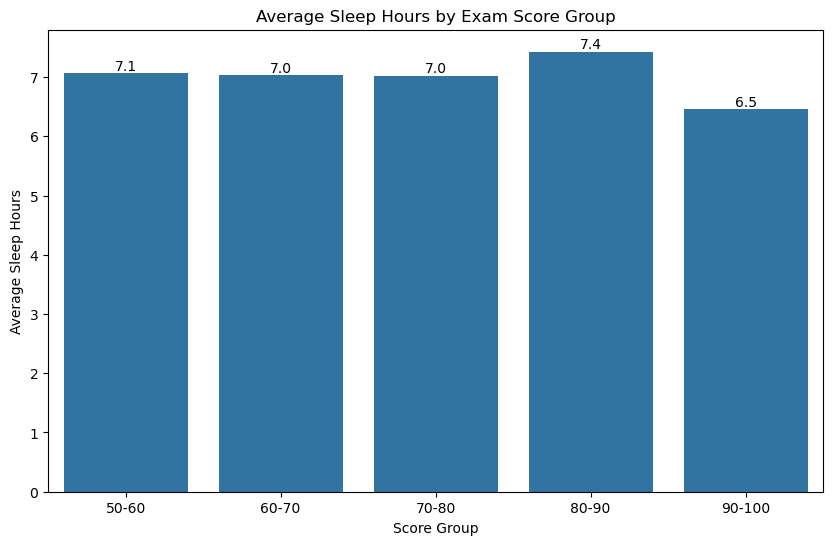

In [36]:
# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sleep_by_score, x='score_group', y='Sleep_Hours')
plt.title('Average Sleep Hours by Exam Score Group')
plt.xlabel('Score Group')
plt.ylabel('Average Sleep Hours')

# Add value labels on top of each bar
for i in ax.patches:
    height = i.get_height()
    ax.annotate(f'{height:.1f}',  # format to 1 decimal place
                (i.get_x() + i.get_width() / 2, height),  # position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

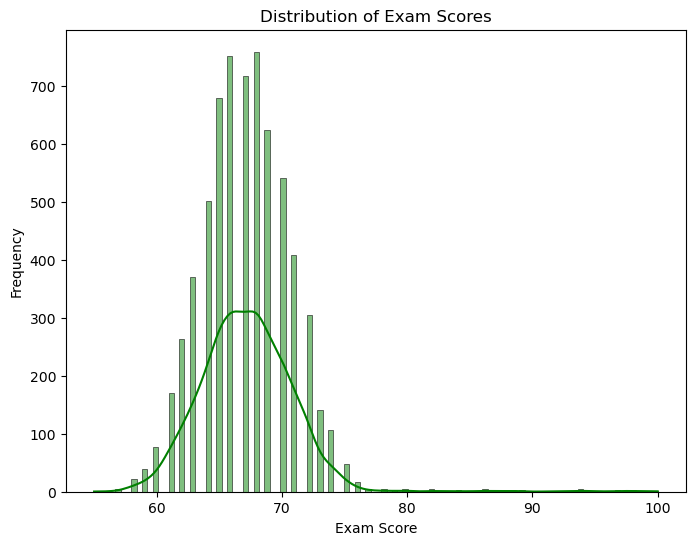

In [37]:
# Histogram showing the distribution of Exam Scores with a KDE (Kernel Density Estimate) for smoothing
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], kde=True, color='green')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

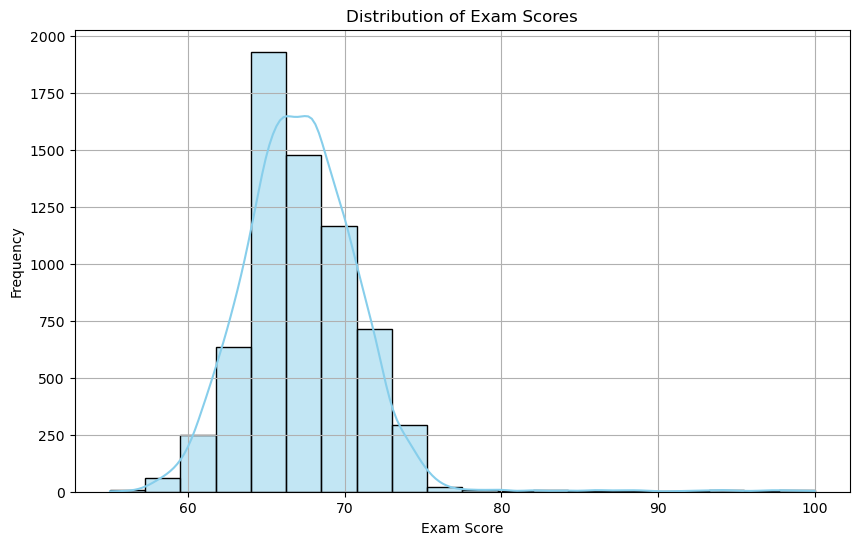

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

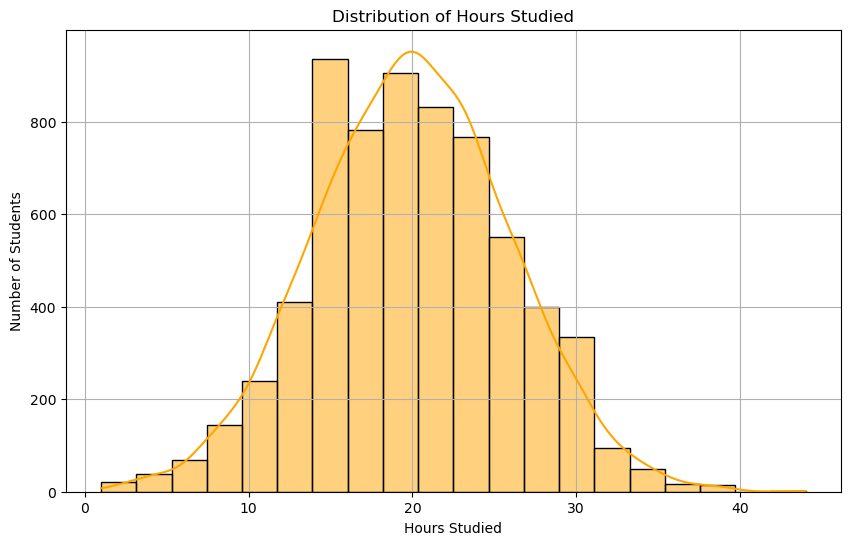

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_Studied'], bins=20, kde=True, color='orange')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

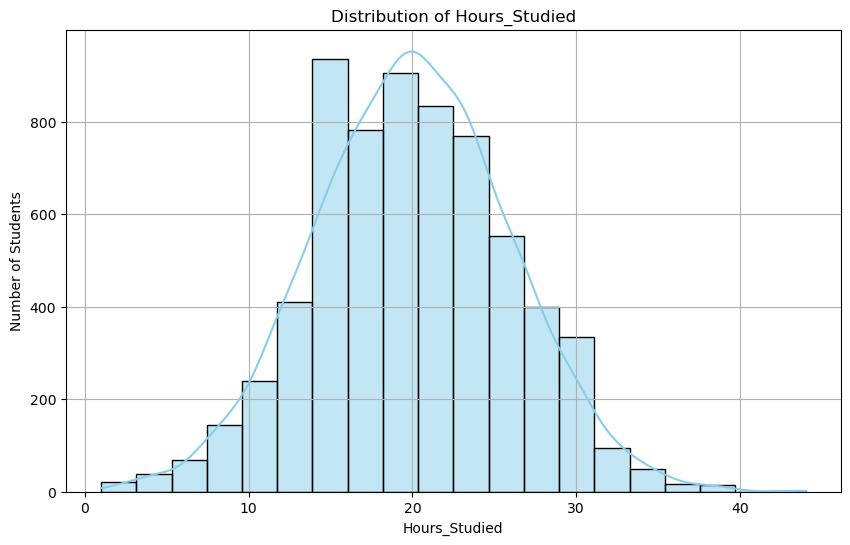

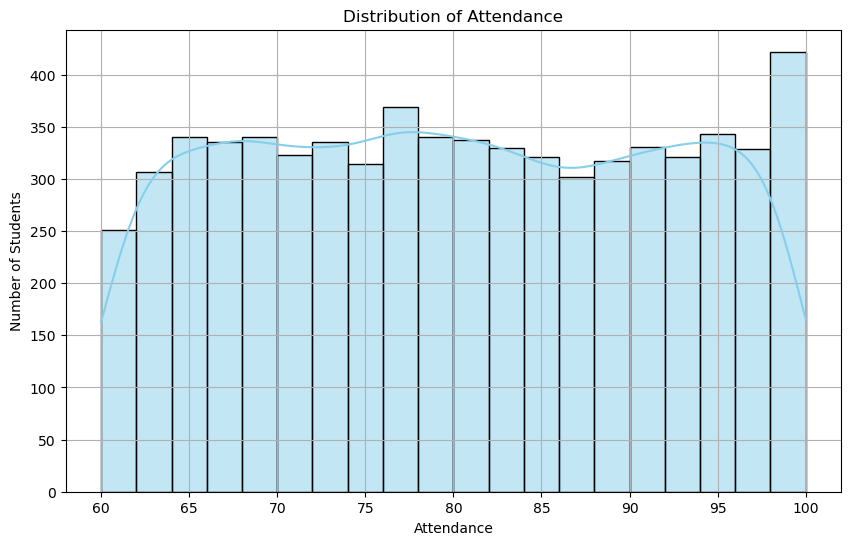

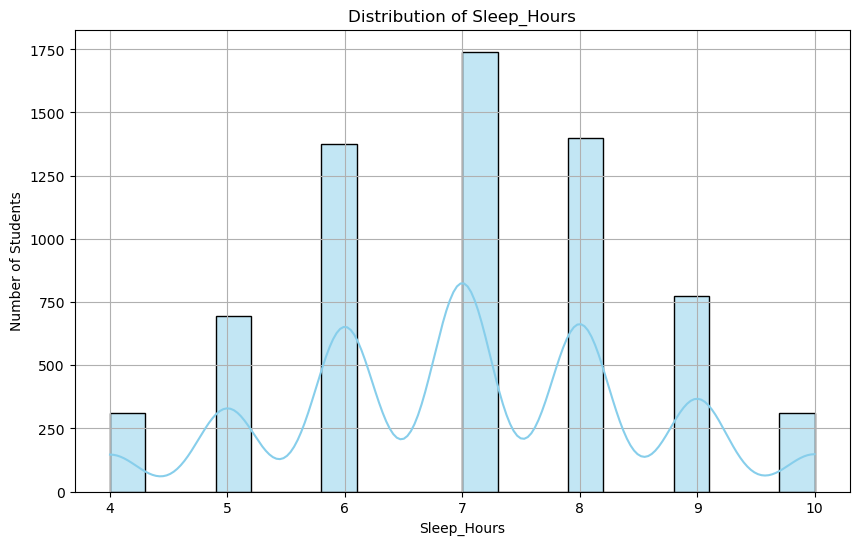

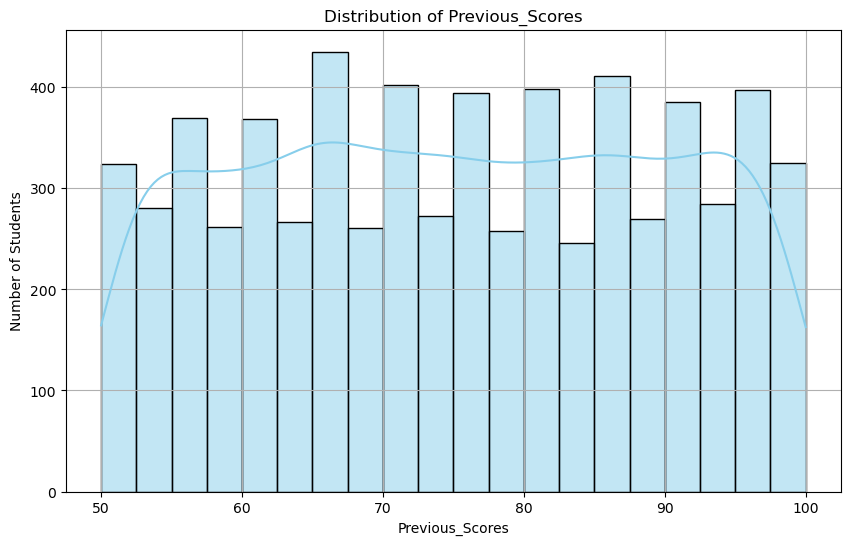

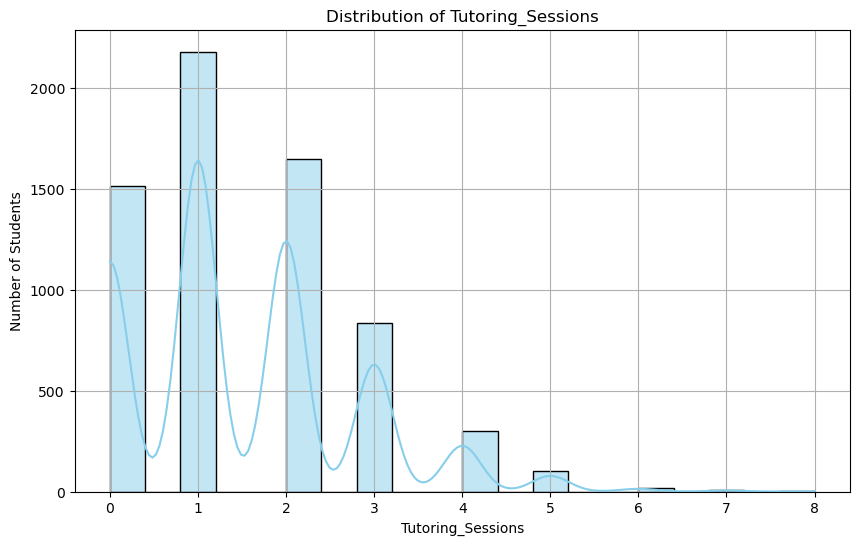

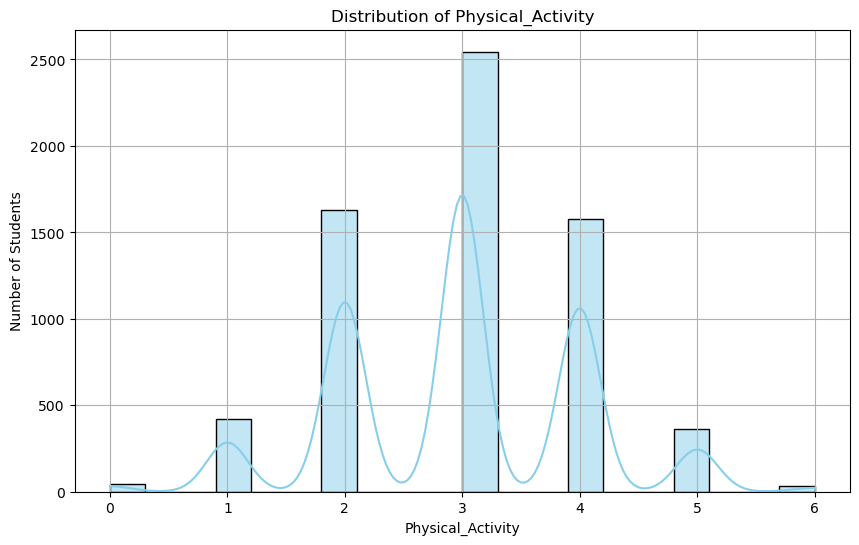

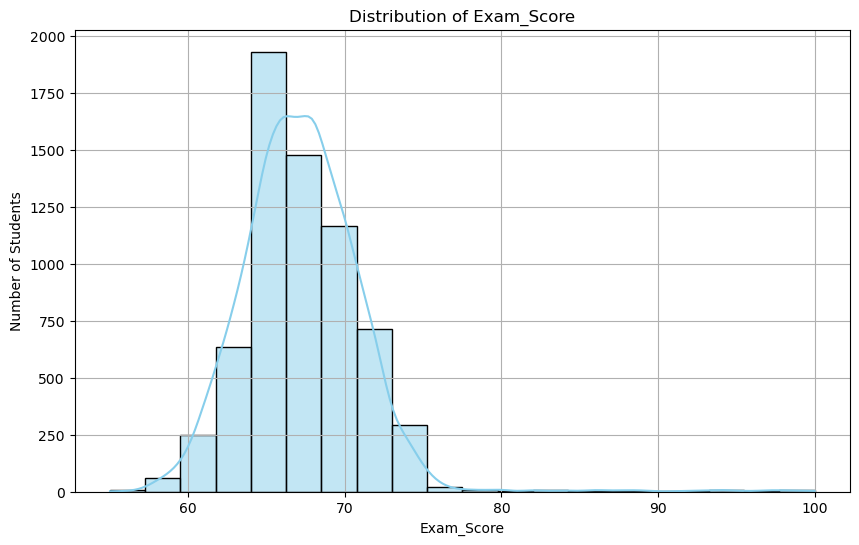

In [40]:
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Students')
    plt.grid(True)
    plt.show()

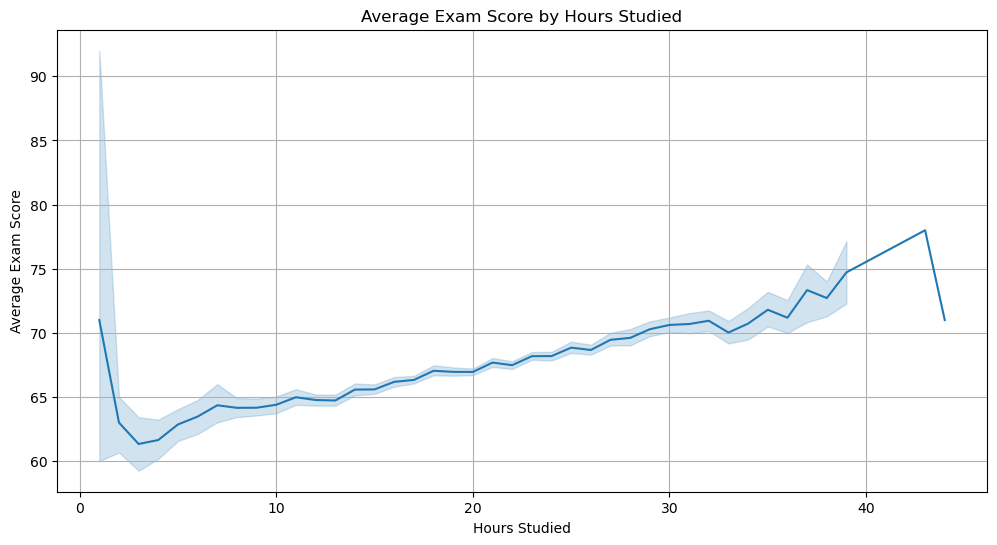

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title("Average Exam Score by Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Average Exam Score")
plt.grid(True)
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


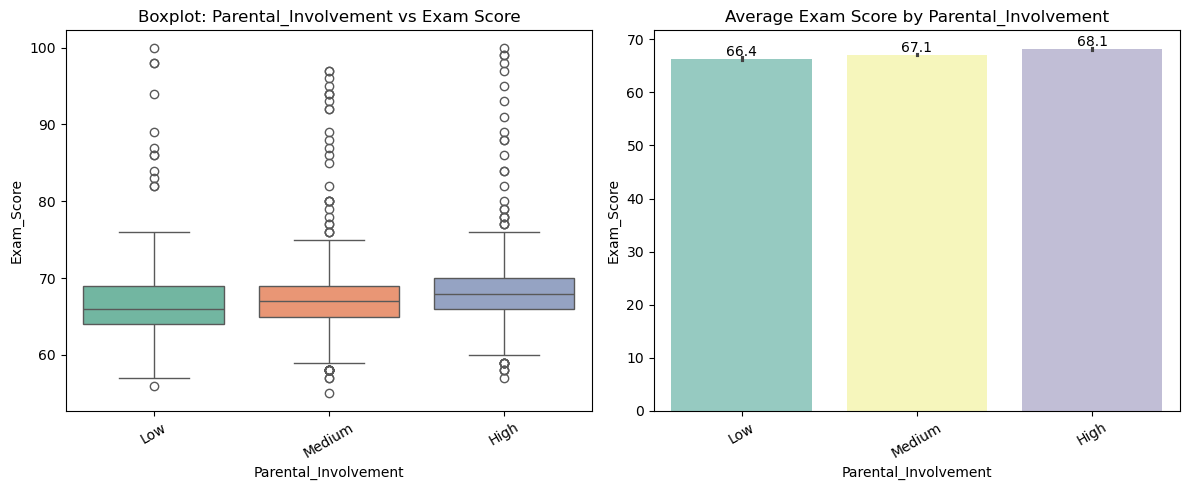

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


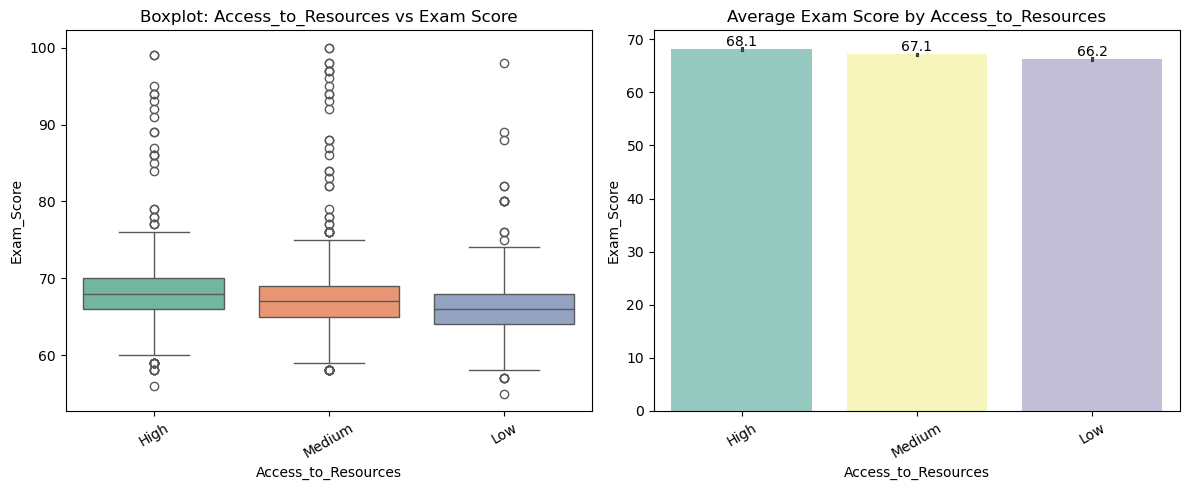

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


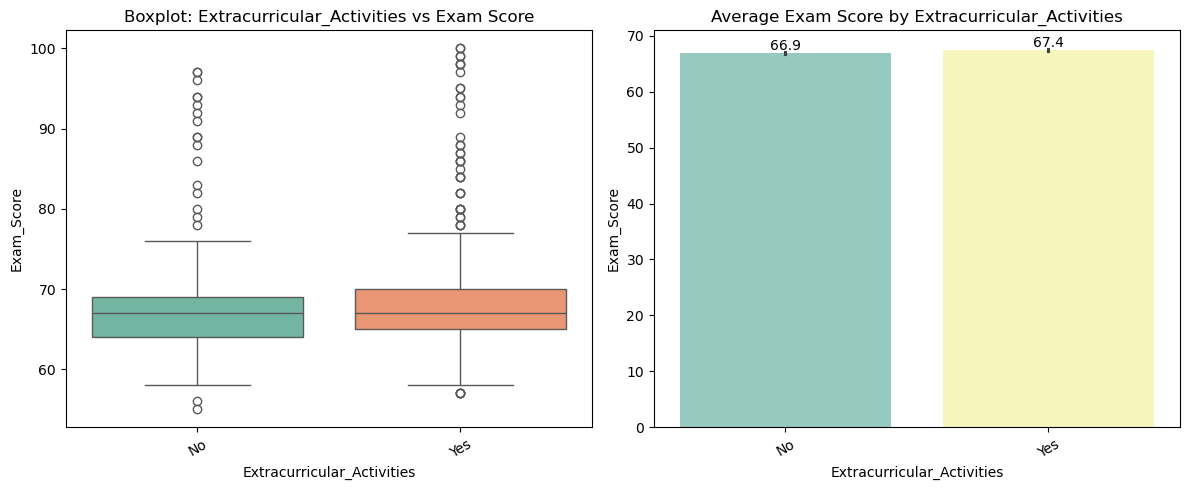

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


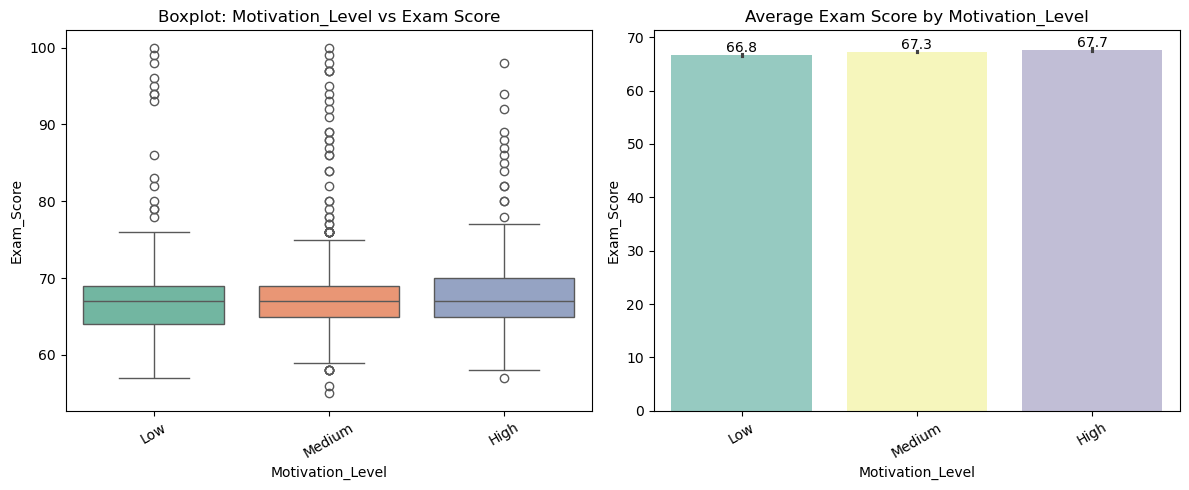

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


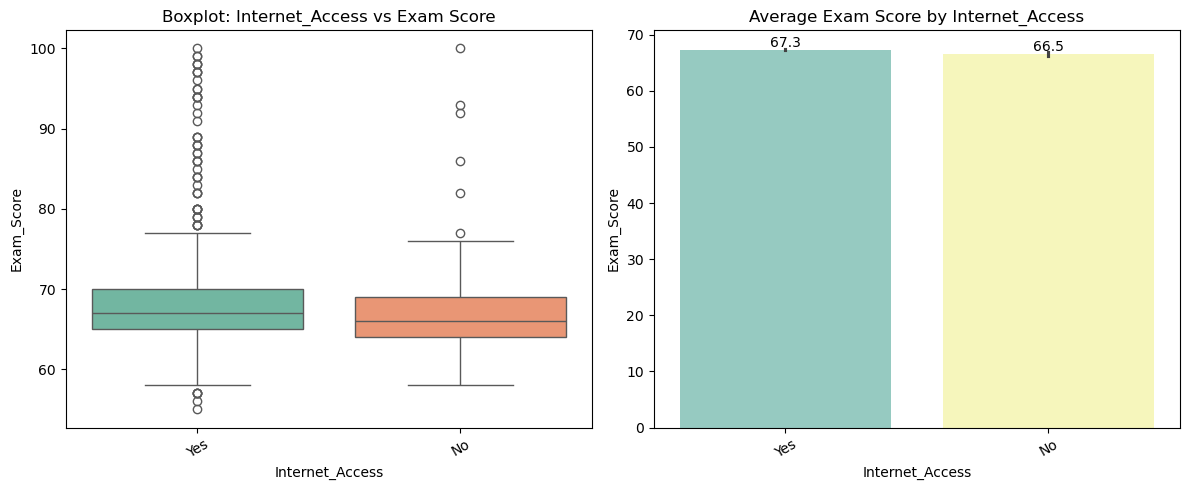

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


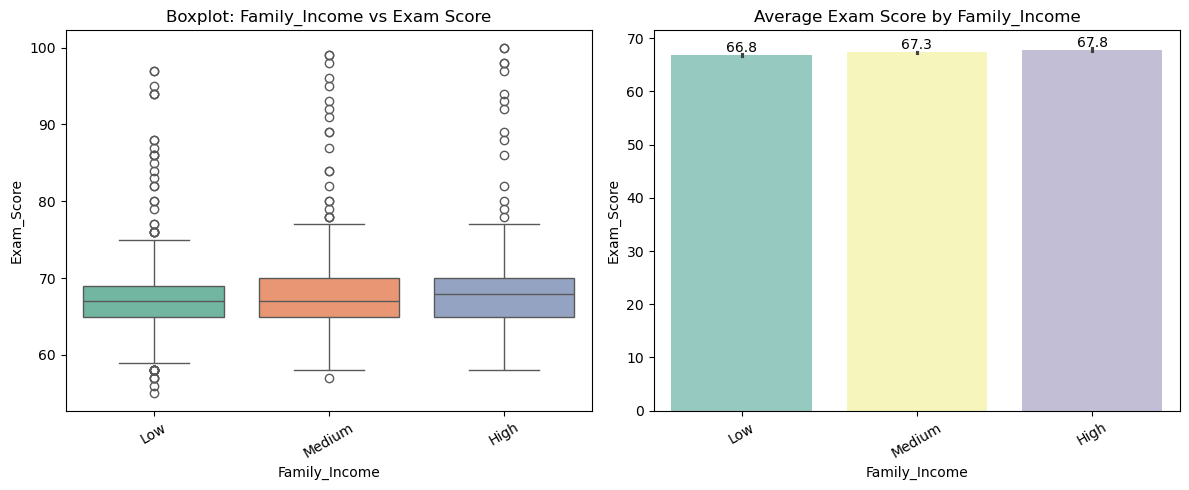

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


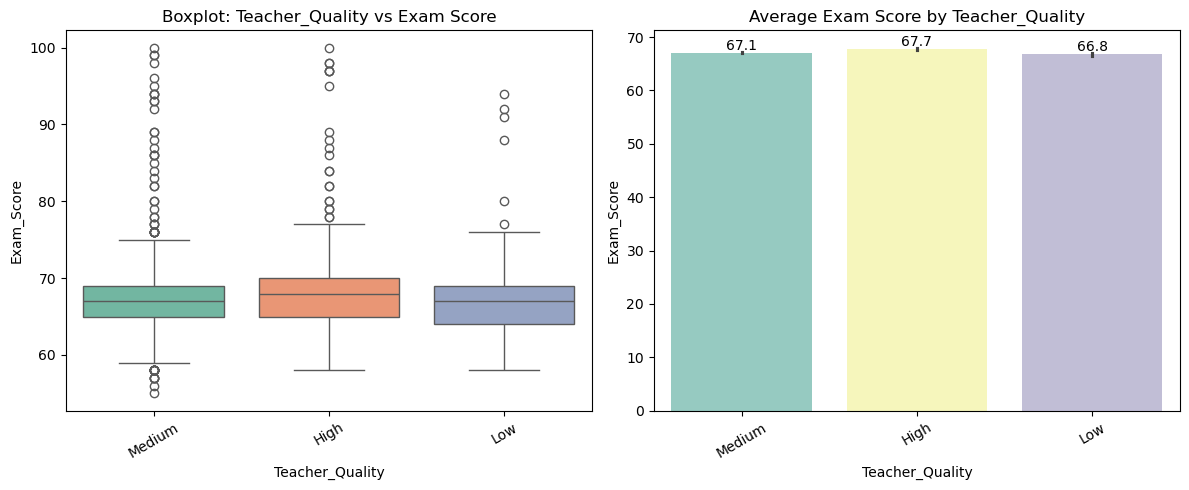

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


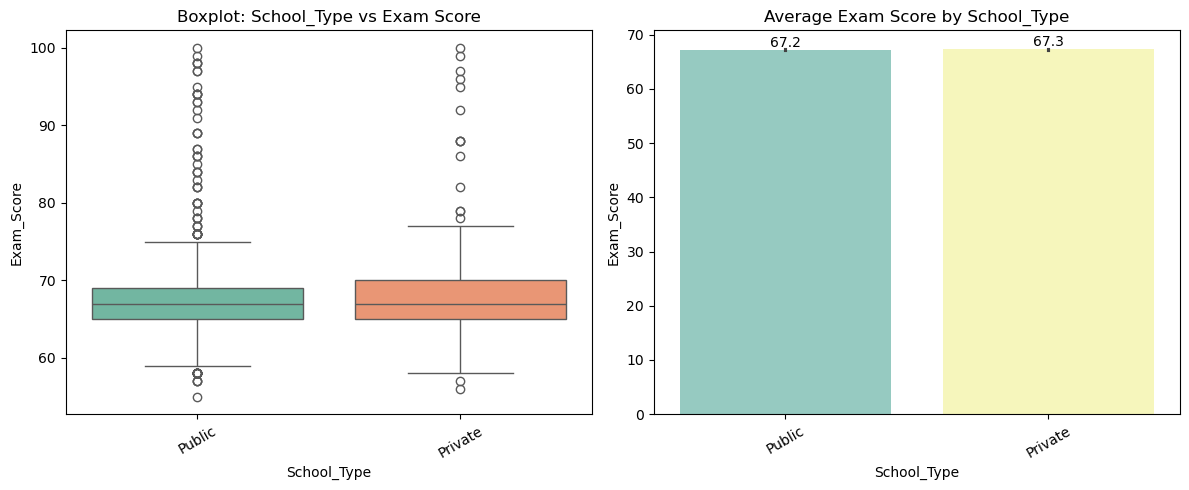

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


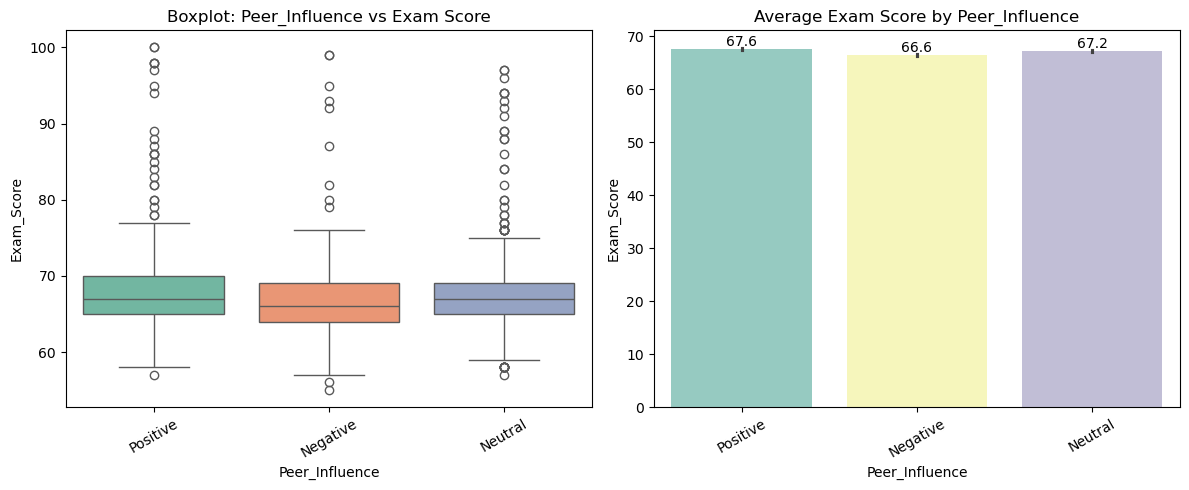

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


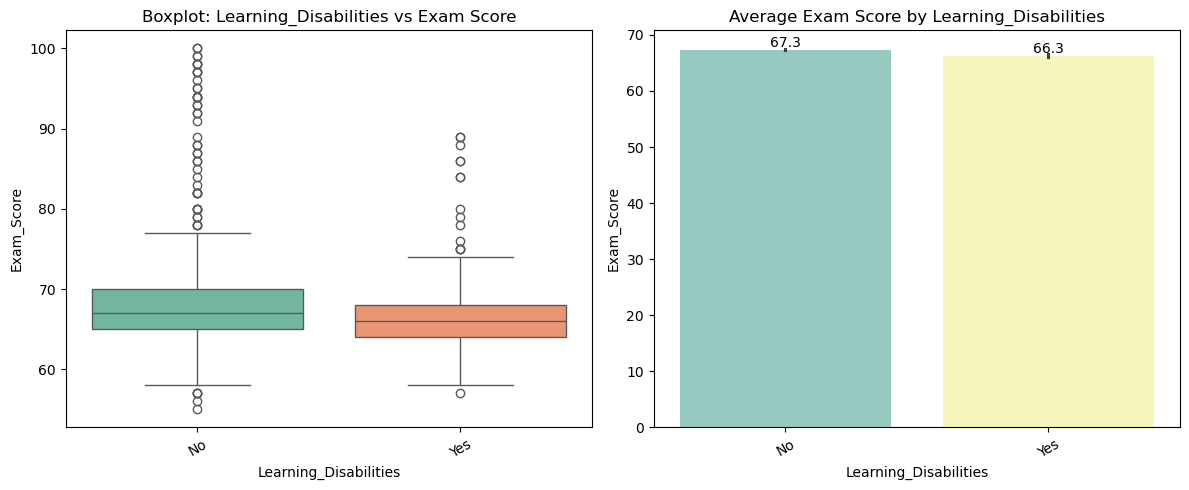

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


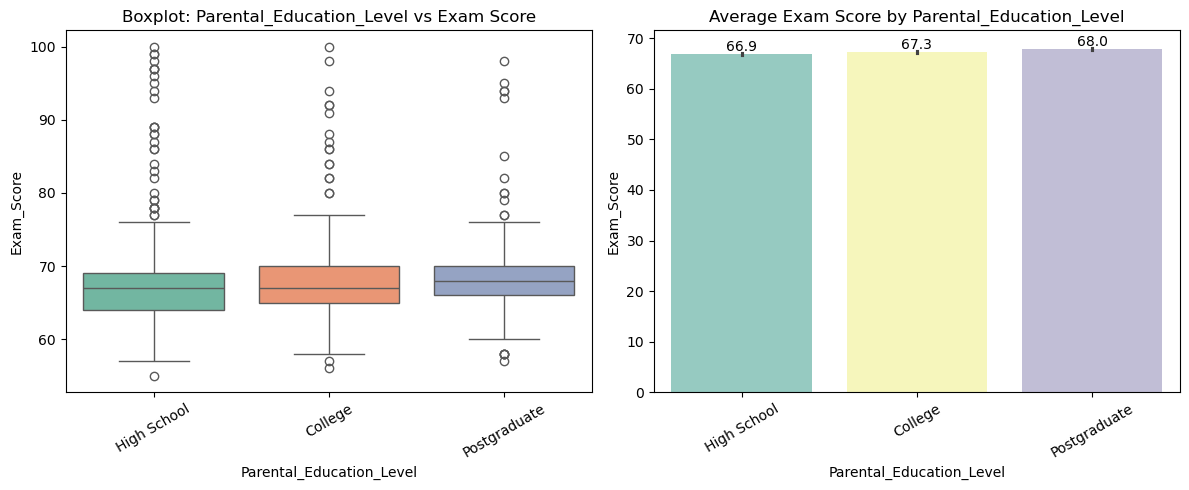

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


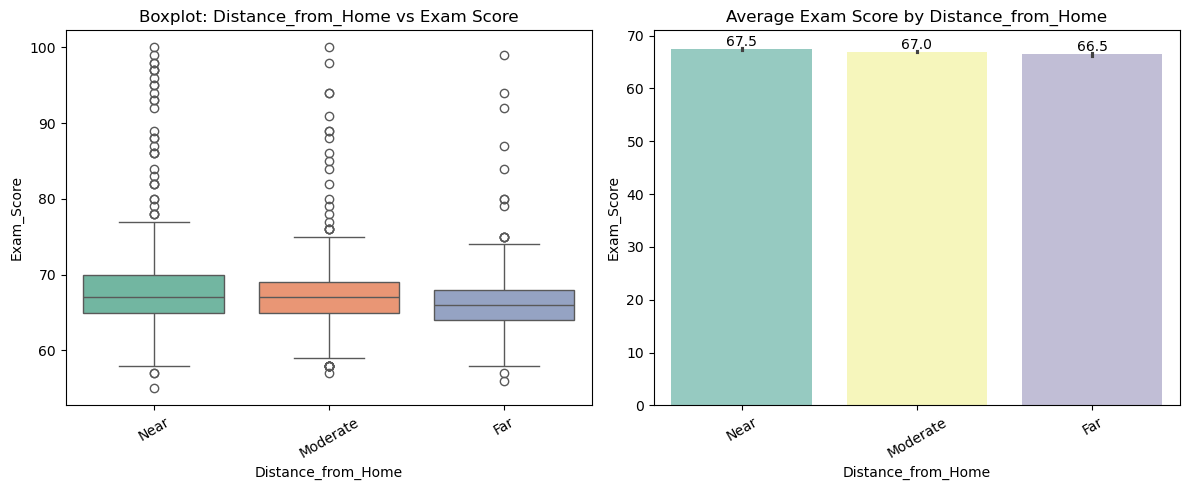

C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
C:\Users\mo\AppData\Local\Temp\ipykernel_7448\504132083.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')


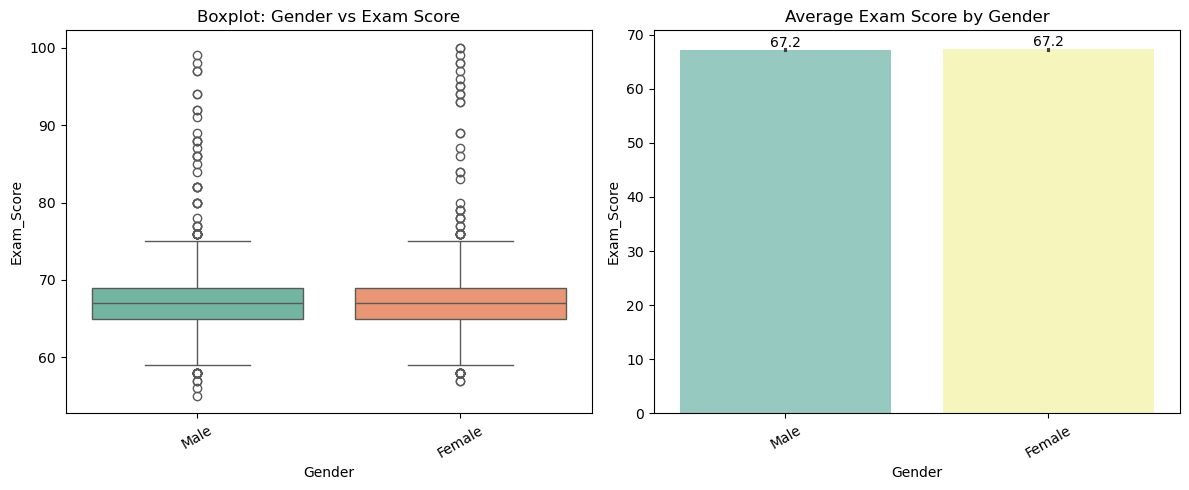

In [42]:
for i in range(len(cat_col)):
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set2')
    plt.title(f'Boxplot: {cat_col[i]} vs Exam Score')
    plt.xticks(rotation=30)

    # Barplot with value labels
    plt.subplot(1, 2, 2)
    ax = sns.barplot(x=cat_col[i], y='Exam_Score', data=df, palette='Set3', estimator='mean')
    plt.title(f'Average Exam Score by {cat_col[i]}')
    plt.xticks(rotation=30)

    # Add labels above each bar
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%.1f', label_type='edge')

    plt.tight_layout()
    plt.show()


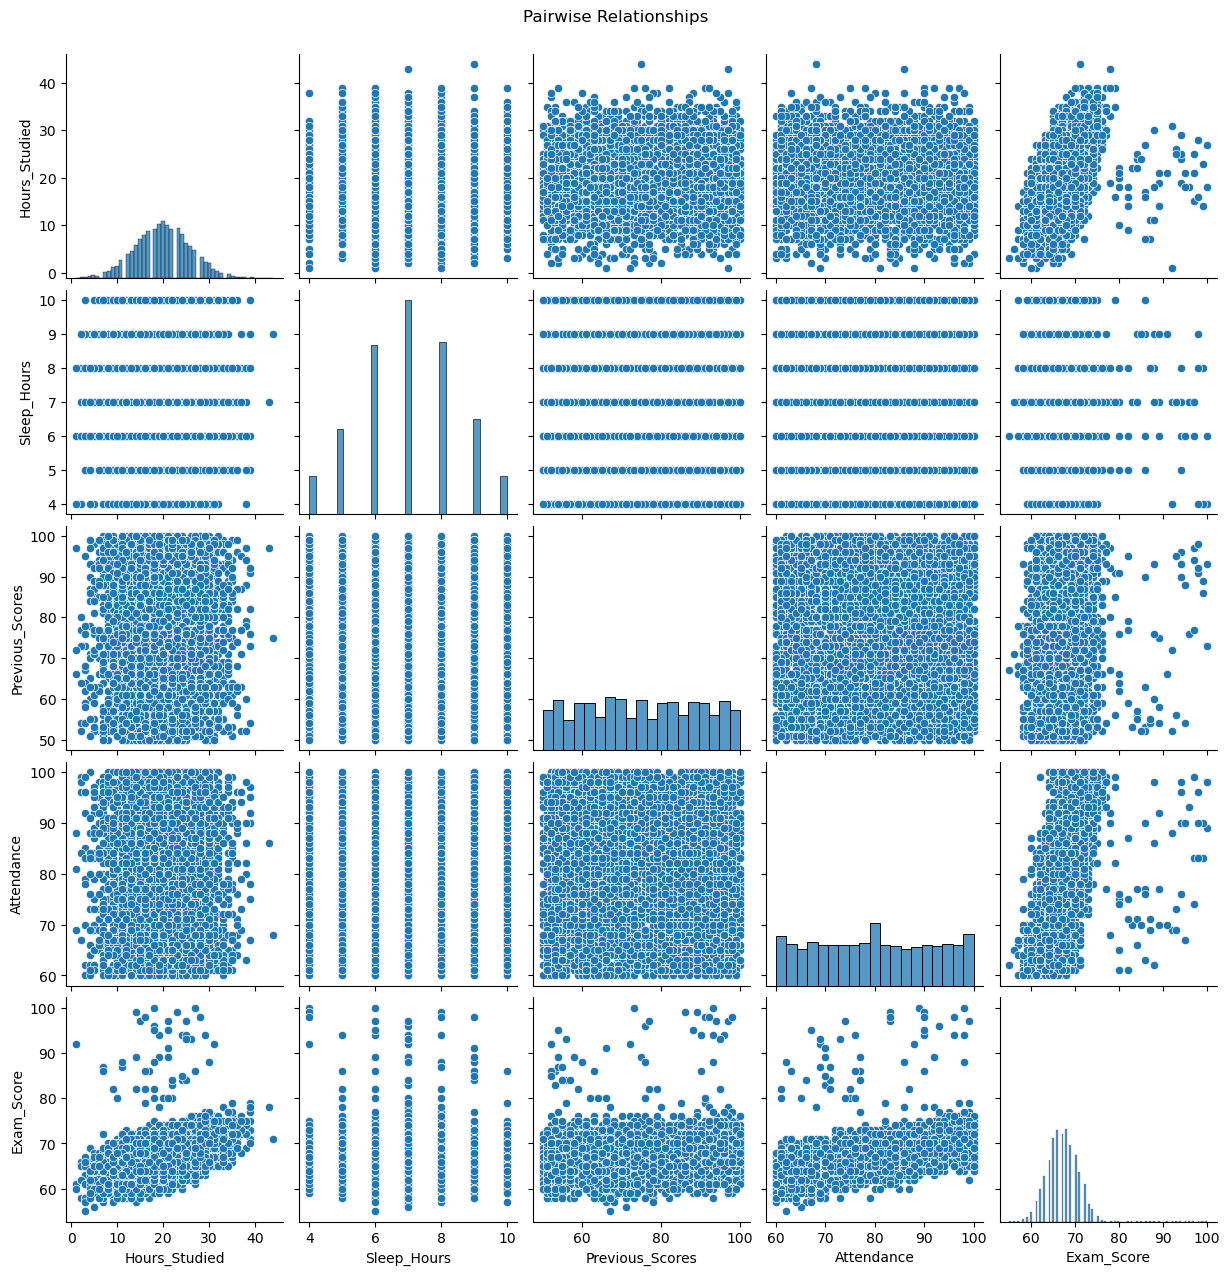

In [43]:
sns.pairplot(df, vars=['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Attendance', 'Exam_Score'])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

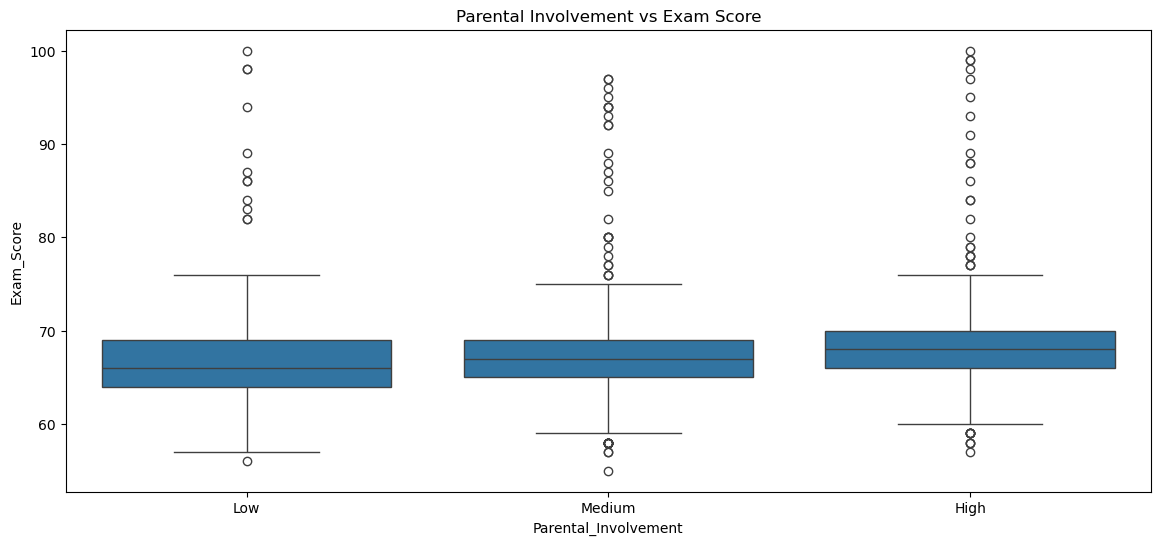

In [44]:
# Boxplot showing the relationship between Parental Involvement and Exam Score
plt.figure(figsize=(14, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Parental Involvement vs Exam Score')
plt.show()

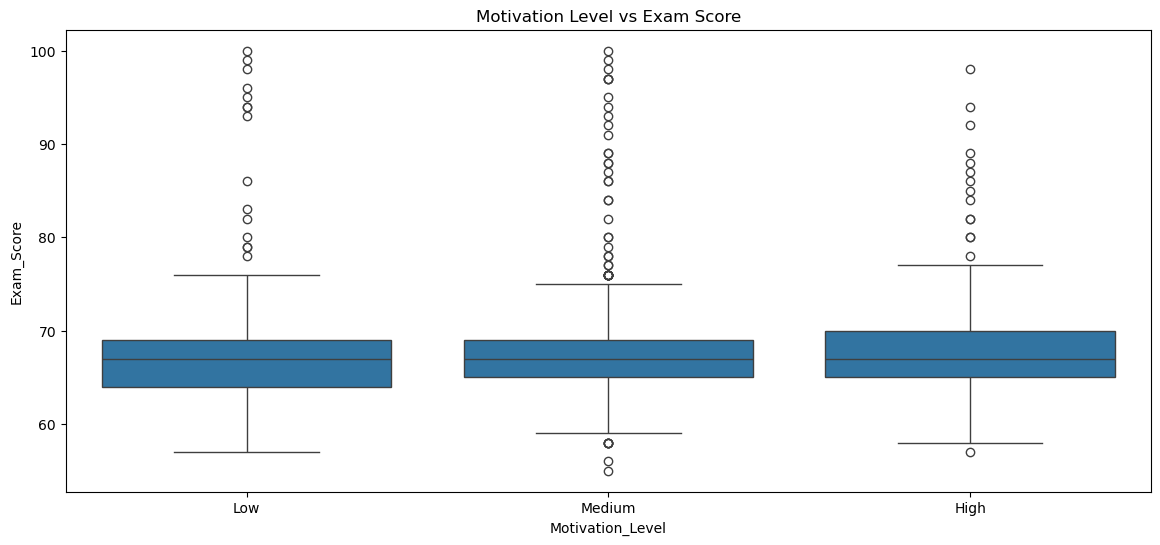

In [45]:
# Boxplot showing the relationship between Motivation Level and Exam Score
plt.figure(figsize=(14, 6))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Motivation Level vs Exam Score')
plt.show()

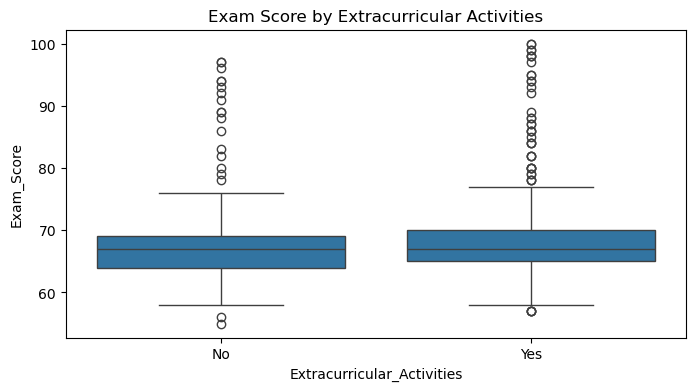

In [46]:
# Boxplot to see relationship
plt.figure(figsize=(8, 4))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title('Exam Score by Extracurricular Activities')
plt.show()

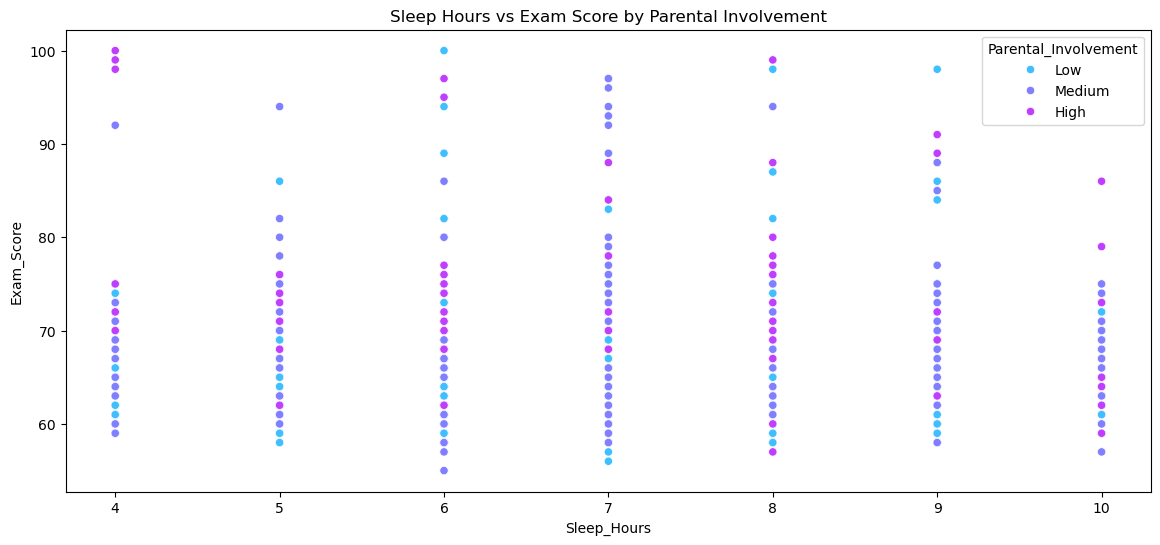

In [47]:
# Scatterplot showing Sleep Hours vs Exam Score, categorized by Parental Involvement
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', hue='Parental_Involvement', data=df, palette='cool')
plt.title('Sleep Hours vs Exam Score by Parental Involvement')
plt.show()

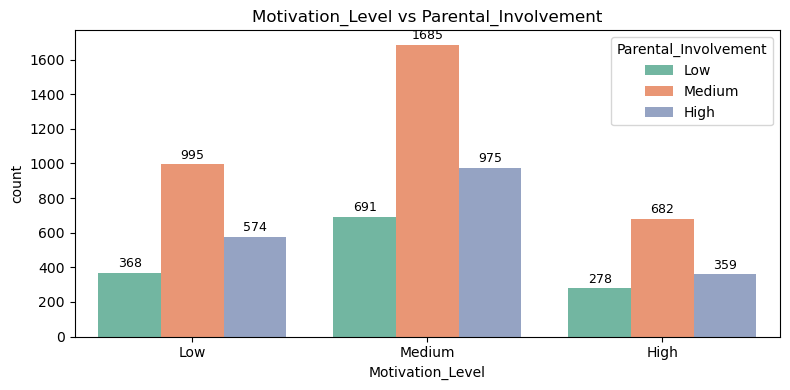

In [48]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df['Motivation_Level'], hue=df['Parental_Involvement'], palette='Set2')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

# Add text (counts) above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

plt.show()


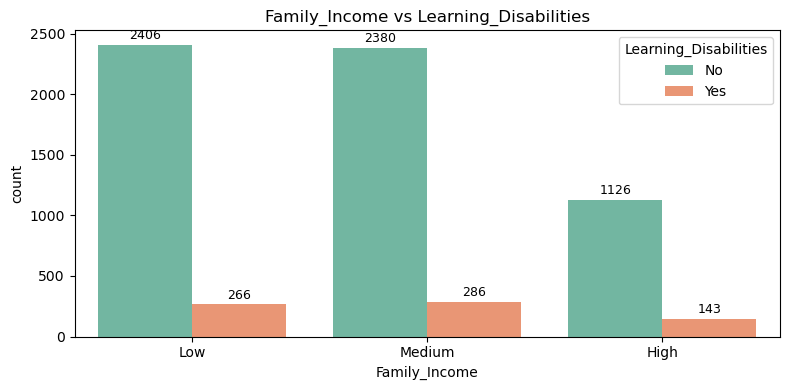

In [49]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df['Family_Income'], hue=df['Learning_Disabilities'], palette='Set2')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

# Add numbers above bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

plt.show()


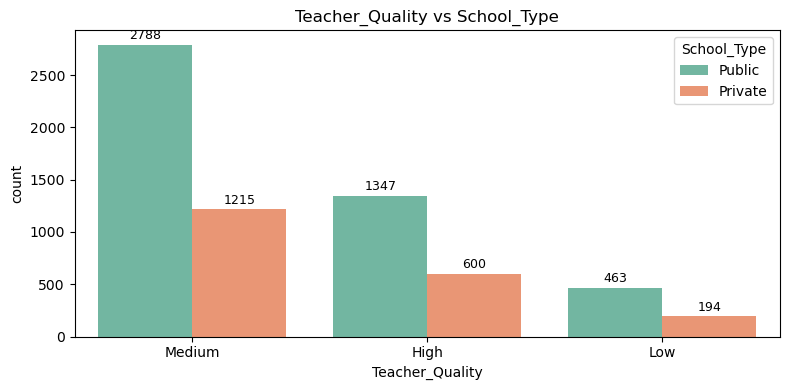

In [50]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df['Teacher_Quality'], hue=df['School_Type'], palette='Set2')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

plt.show()

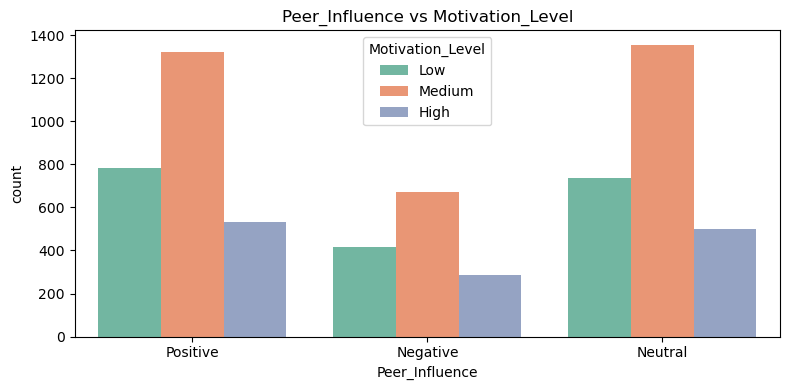

In [51]:
# Countplot showing Peer Influence distribution by Motivation Level
plt.figure(figsize=(8,4))
sns.countplot(x=df['Peer_Influence'],hue=df['Motivation_Level'],palette='Set2')
plt.title('Peer_Influence vs Motivation_Level')
plt.tight_layout()

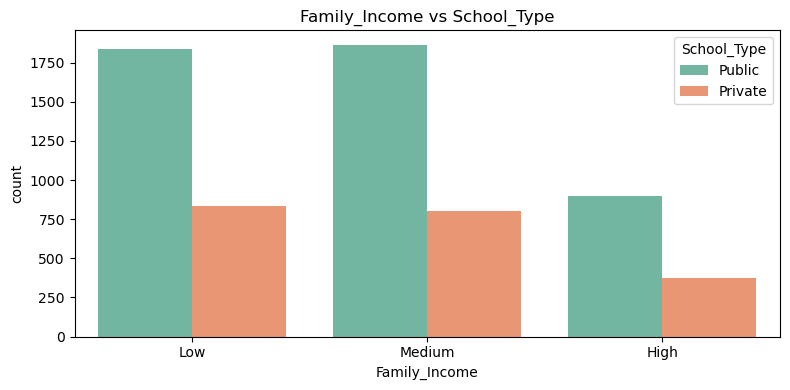

In [52]:
# Countplot showing Family Income distribution by Learning Disabilities
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'],hue=df['School_Type'],palette='Set2')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

### Feature Engineering

In [54]:
df.columns.value_counts().index.tolist()

['Hours_Studied',
 'Teacher_Quality',
 'Exam_Score',
 'Gender',
 'Distance_from_Home',
 'Parental_Education_Level',
 'Learning_Disabilities',
 'Physical_Activity',
 'Peer_Influence',
 'School_Type',
 'Family_Income',
 'Attendance',
 'Tutoring_Sessions',
 'Internet_Access',
 'Motivation_Level',
 'Previous_Scores',
 'Sleep_Hours',
 'Extracurricular_Activities',
 'Access_to_Resources',
 'Parental_Involvement',
 'score_group']

In [55]:
columns_to_drop = [
    'score_group',
    'Gender',
    'Distance_from_Home',
    'School_Type',
    'Teacher_Quality',
    'Parental_Education_Level',
    'Internet_Access'
    ''
]

df.drop(columns=columns_to_drop, inplace=True)

In [56]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Learning_Disabilities,Exam_Score
0,23,84,Low,High,No,7,73,Low,0,Low,Positive,3,No,67
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Negative,4,No,61
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Neutral,4,No,74
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Negative,4,No,71
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,Neutral,4,No,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,1,High,Positive,2,No,68
6603,23,76,High,Medium,No,8,81,Medium,3,Low,Positive,2,No,69
6604,20,90,Medium,Low,Yes,6,65,Low,3,Low,Negative,2,No,68
6605,10,86,High,High,Yes,6,91,High,2,Low,Positive,3,No,68


### Train-Test Split

In [58]:
# Define features and target
X = df.drop(['Exam_Score'], axis=1)
y = df['Exam_Score']

In [59]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        combined = pd.concat([X_train[col], X_test[col]])
        le.fit(combined)
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

In [61]:
# Scaling the features using MinMaxScaler to a range between 0 and 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
df.shape

(6607, 14)

In [63]:
print(X_train.shape)
print(X_test.shape)

(5285, 13)
(1322, 13)


### Model Training
* Fit Linear Regression model
* Fit Polynomial Regression model
* Ridge
* SVR

In [65]:
# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict with Linear Regression
y_pred_linear = lin_reg.predict(X_test)

In [67]:
# Evaluate both models
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))

Linear Regression:
MSE: 4.606718508355241
MAE: 1.0890551244930924
R² Score: 0.6740930393433389


In [68]:
print("train_score: ",lin_reg.score(X_train,y_train))
print("test_score: ",lin_reg.score(X_test,y_test))

train_score:  0.6283889198719826
test_score:  0.6740930393433389


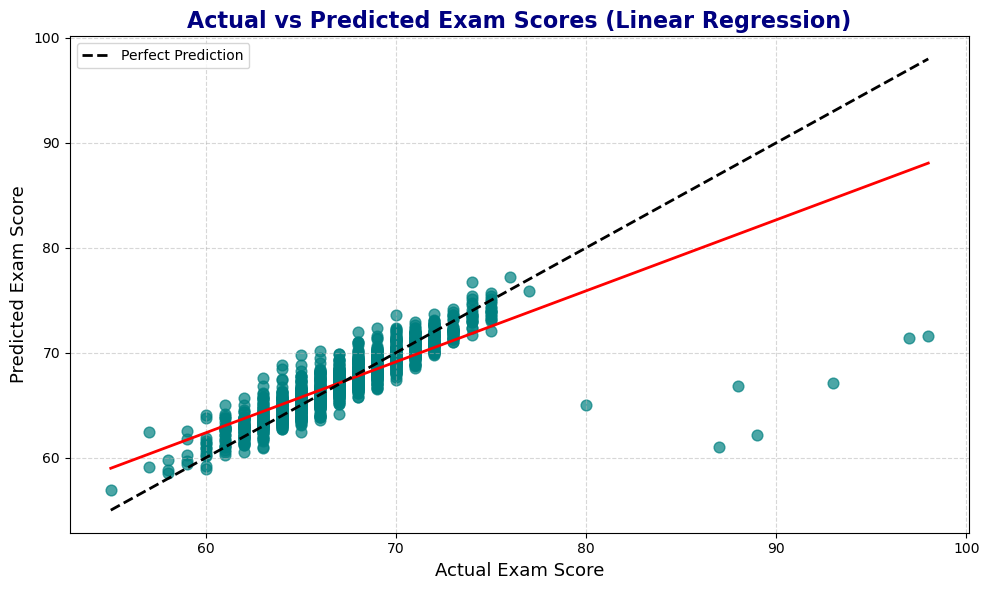

In [69]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    x=y_test,
    y=y_pred_linear,
    ci=None,
    color='teal',
    marker='o',
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red', 'lw': 2}
)

# Reference line for perfect prediction
max_val = max(max(y_test), max(y_pred_linear))
min_val = min(min(y_test), min(y_pred_linear))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', lw=2, label='Perfect Prediction')

# Title and labels
plt.title('Actual vs Predicted Exam Scores (Linear Regression)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Actual Exam Score', fontsize=13)
plt.ylabel('Predicted Exam Score', fontsize=13)

# Add legend, grid, and layout
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [70]:
# Polynomial Features (e.g., degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [71]:
# Fit Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [72]:
y_pred_poly = poly_reg.predict(X_test_poly)

In [73]:
print("Polynomial Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))

Polynomial Regression Results:
MSE: 3.715474851672959
MAE: 0.7355659384264276
R² Score: 0.7371449733451749


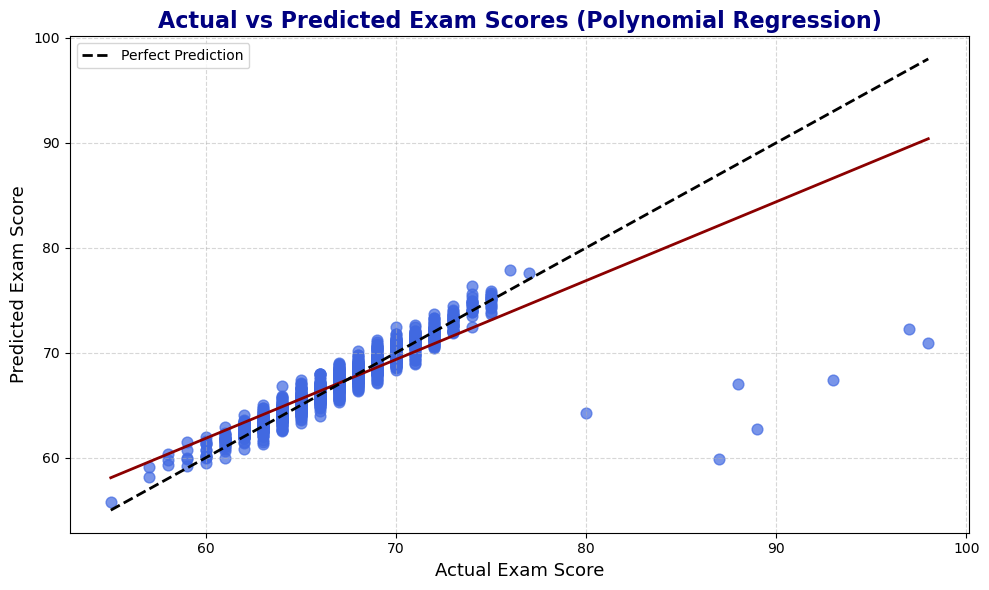

In [74]:
# Predict using Polynomial Regression
y_pred_poly = poly_reg.predict(X_test_poly)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    x=y_test,
    y=y_pred_poly,
    ci=None,
    color='royalblue',
    marker='o',
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'darkred', 'lw': 2}
)

# Reference line for perfect prediction
max_val = max(max(y_test), max(y_pred_poly))
min_val = min(min(y_test), min(y_pred_poly))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', lw=2, label='Perfect Prediction')

# Title and labels
plt.title('Actual vs Predicted Exam Scores (Polynomial Regression)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Actual Exam Score', fontsize=13)
plt.ylabel('Predicted Exam Score', fontsize=13)

# Add legend, grid, and layout
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


In [75]:
# Training a Ridge Regression model on the scaled training data (with regularization alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [76]:
# Making predictions on the test set using the trained Ridge Regression model
y_pred_ridge = ridge.predict(X_test)

In [77]:
# Calculating and printing the mean squared error (MSE) and R² scores for the Ridge model
print("mean_squared_error (Ridge): ", mean_squared_error(y_test, y_pred_ridge))
print("train_score (Ridge): ", ridge.score(X_train, y_train))
print("validation_score (Ridge): ", ridge.score(X_test, y_test))

mean_squared_error (Ridge):  4.606642307502316
train_score (Ridge):  0.6283888961242143
validation_score (Ridge):  0.6740984302497577


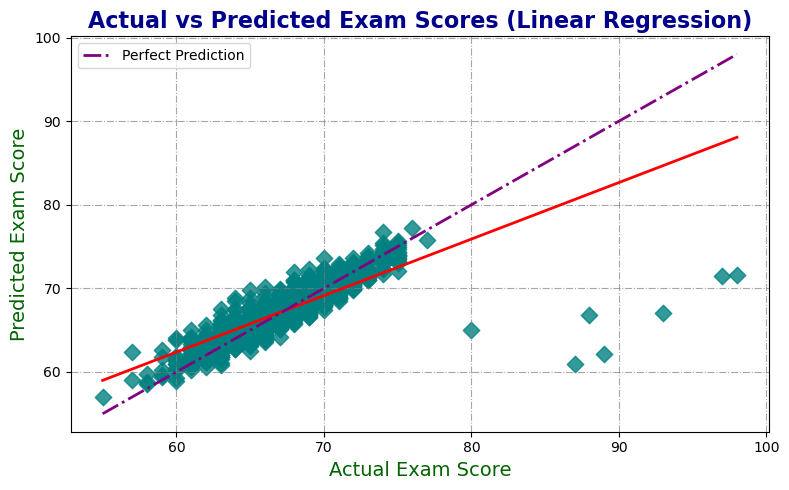

In [78]:
# Plotting Actual vs Predicted values for Linear Regression
plt.figure(figsize=(8, 5))

# Scatter plot of actual vs predicted values
sns.regplot(
    x=y_test,
    y=y_pred_ridge,  # Ensure y_pred is your linear model predictions
    ci=None,
    color='teal',
    marker='D',
    scatter_kws={'s': 70, 'alpha': 0.8},
    line_kws={'color': 'red', 'lw': 2}
)

# Reference line (perfect prediction line)
max_val = max(max(y_test), max(y_pred_ridge))
min_val = min(min(y_test), min(y_pred_ridge))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=2, label='Perfect Prediction')

# Title and axis labels
plt.title('Actual vs Predicted Exam Scores (Linear Regression)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Actual Exam Score', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Exam Score', fontsize=14, color='darkgreen')

# Grid, legend, and layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')
plt.legend()
plt.tight_layout()
plt.show()


In [79]:
# Support Vector Regression (SVR) Model
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [80]:
y_pred=svr.predict(X_test)

In [81]:
# Printing evaluation metrics for SVR
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(X_train,y_train))
print("test_score: ",svr.score(X_test,y_test))

mean_squared_error:  4.955170404517637
train_score:  0.5925671515481027
test_score:  0.6494414574836339


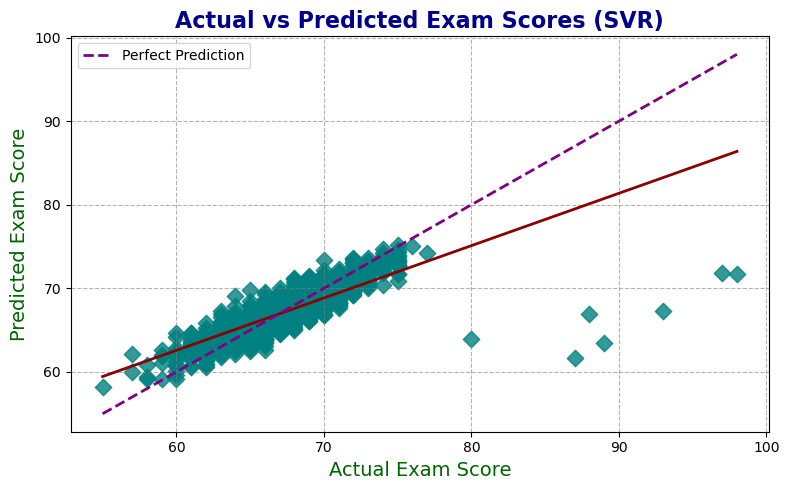

In [82]:
# Plotting Actual vs Predicted values for Support Vector Regression (SVR)
plt.figure(figsize=(8, 5))

# Scatter plot: True vs Predicted values
sns.regplot(
    x=y_test,
    y=y_pred,  # Predictions from SVR model
    ci=None,
    color='teal',
    marker='D',
    scatter_kws={'s': 70, 'alpha': 0.8},
    line_kws={'color': 'darkred', 'lw': 2}
)

# Reference line for perfect prediction
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='--', lw=2, label='Perfect Prediction')

# Title and axis labels
plt.title('Actual vs Predicted Exam Scores (SVR)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Actual Exam Score', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Exam Score', fontsize=14, color='darkgreen')

# Grid, legend, and layout adjustments
plt.grid(True, linestyle='--', alpha=0.6, color='grey')
plt.legend()
plt.tight_layout()
plt.show()


In [83]:
names = ['Linear Regression', 'Ridge', 'SVR', 'Polynomial Regression']

acc = [
    lin_reg.score(X_test, y_test),
    ridge.score(X_test, y_test),
    svr.score(X_test, y_test),
    poly_reg.score(X_test_poly, y_test)  
]
print("Model Accuracy Scores (R² on Test Set):\n")
for name, score in zip(names, acc):
    print(f"{name}: {score:.2f}%")

Model Accuracy Scores (R² on Test Set):

Linear Regression: 0.67%
Ridge: 0.67%
SVR: 0.65%
Polynomial Regression: 0.74%


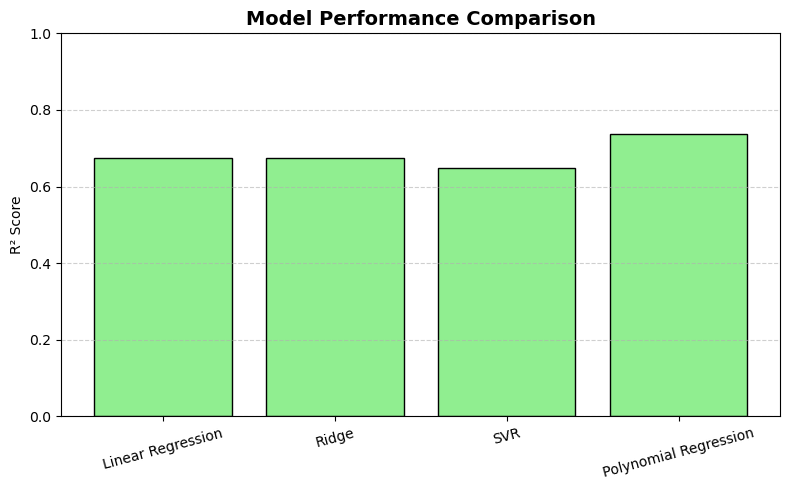

In [84]:
plt.figure(figsize=(8, 5))
plt.bar(names, acc, color='lightgreen', edgecolor='black')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [85]:
feature_names = X.columns.tolist()

In [91]:
# Save model, poly, feature count, and names
pickle.dump(poly_reg, open("poly_model.pkl", "wb"))
pickle.dump(poly, open("poly_features.pkl", "wb"))
pickle.dump(len(feature_names), open("n_features.pkl", "wb"))
pickle.dump(feature_names, open("feature_names.pkl", "wb"))

print("✅ Model, features, and names saved successfully!")

✅ Model, features, and names saved successfully!


In [95]:
# Load saved objects
model = pickle.load(open("poly_model.pkl", "rb"))
poly = pickle.load(open("poly_features.pkl", "rb"))
n_features = pickle.load(open("n_features.pkl", "rb"))
feature_names = pickle.load(open("feature_names.pkl", "rb"))

# Get user input with column names
user_input = []
for name in feature_names:
    val = float(input(f"Enter value for '{name}': "))
    user_input.append(val)

# Prepare for prediction
user_input = np.array(user_input).reshape(1, -1)
user_input_poly = poly.transform(user_input)
prediction = model.predict(user_input_poly)

print(f"Predicted exam score: {prediction[0]:.2f}")

Enter value for 'Hours_Studied':  19
Enter value for 'Attendance':  84
Enter value for 'Parental_Involvement':  0
Enter value for 'Access_to_Resources':  1
Enter value for 'Extracurricular_Activities':  0
Enter value for 'Sleep_Hours':  8
Enter value for 'Previous_Scores':  59
Enter value for 'Motivation_Level':  0
Enter value for 'Tutoring_Sessions':  2
Enter value for 'Family_Income':  2
Enter value for 'Peer_Influence':  0
Enter value for 'Physical_Activity':  4
Enter value for 'Learning_Disabilities':  0


Predicted exam score: 66.92


C:\Users\mo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
